<b> MIS 382N: ADVANCED MACHINE LEARNING<b>

Assignment 5

Total points: 55

Due:  to be submitted via Canvas by 11:59 pm, Mon Nov 21st.

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

**Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Praneet Kumar Alamuri

EID: pa22222

Name: Shreyansh Agrawal

EID: sa55742

# Question 1: Ensemble Methods [10 pts]
Read this [article](https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db) on different boosting methods. Briefly describe the main advantages and disadvantages of  CatBoost as compared to XGBoost.

#Answer:

**Advantages of CatBoost over XGBoost:**  

1) Categorical features encoding - It automatically performs one hot encoding on the categorical columns. Also, how high cardinality features it uses an efficient method that reduces overfitting.

2) Faster - CatBoost builds symmetric trees; this approach leads to less less prediction time. Also, it controls overfitting as it has the functionality to also perform regularization.     

3) CatBoost has a functionality to stop training earlier that the training parameters provided if overfitting occurs 

4) CatBoost also provides three strategies to handle missing values    

**Disadvantages of CatBoost over XGBoost:**

One major disadvantage of Catboost is - 

a) As seen in the article, CatBoost performs well only if there are categorical variables and proper hyperparameter tuning is done. (Example given in article - The best result was obtained only after one_hot_max_size encoding)

# Question 2 : Ensemble Methods for Classification [25 pts]

We look at the following dataset [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) for this question. The dataset is extremely large so for this question we only consider a subset of the data which has been provided along with the notebook for this assignment.
The task is to predict the probability that someone will experience financial distress in the next two years. The dataset has already been split into train and test sets.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [1]:
import pandas as pd

data = pd.read_csv('hw5_data.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.571373,66,0,0.430620,9274.0,10,0,1,0,0.0
1,0,0.233999,56,0,0.257380,5656.0,12,0,0,0,0.0
2,0,0.299270,33,0,0.114575,4747.0,8,0,0,0,3.0
3,0,0.032165,41,0,0.308326,8490.0,8,0,1,0,0.0
4,0,0.050591,36,0,0.862627,3333.0,8,0,2,0,0.0


In [2]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (3750, 10) (3750,)
test (1250, 10) (1250,)


In this question, we will compare performance of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) Classifiers.

a) **[2.5 pts]** Use a Decision Tree Classifier with random_state = 14 for the classification problem. Report the accuracy_score and roc_auc_score on the test data for the classifier.

b) **[2.5 pts]** Create an ensemble of 25 classifiers (i.e n_estimators = 25) with random_state = 14 for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) with base classifier as Decision Tree Classifier from part a). Report accuracy_score and roc_auc_score on the test data for the Bagging classifiers. 

c) **[5 pts]** Use the training data and build a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model for the classification problem. Find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the optimal parameters obtained by GridSearch. Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data using the model fit with best parameters.

d) **[5 pts]** Use [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

e) **[5 pts]** Use [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

f) **[5 pts]** Compare the performance of decision tree from part a) with the ensemble methods, Briefly explain which of the three ensemble method performed better and why?

In [80]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
from sklearn.model_selection import GridSearchCV
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
columns_list = list(X.columns)

In [68]:
model_scores = dict()
scores = pd.DataFrame(columns=['model','accuracy','roc_auc_score'])

a) [2.5 pts] Use a Decision Tree Classifier with random_state = 14 for the classification problem. Report the accuracy_score and roc_auc_score on the test data for the classifier.

In [69]:
# Part a)

model = DecisionTreeClassifier(random_state = 14)
result = model.fit(X_train, y_train)

prediction = result.predict(X_test)
pred_probs = result.predict_proba(X_test)[:,1]
print('accuracy_score is = ',accuracy_score(y_test, prediction))
print('roc_auc_score is = ',roc_auc_score(y_test, pred_probs))

model_scores['model'] = 'decision_tree'
model_scores['accuracy'] = accuracy_score(y_test, prediction) 
model_scores['roc_auc_score'] = roc_auc_score(y_test, pred_probs)
scores = scores.append(model_scores, ignore_index=True)

accuracy_score is =  0.888
roc_auc_score is =  0.5854582176218127


b) [2.5 pts] Create an ensemble of 25 classifiers (i.e n_estimators = 25) with random_state = 14 for bagging with base classifier as Decision Tree Classifier from part a). Report accuracy_score and roc_auc_score on the test data for the Bagging classifiers.

In [70]:
# Part b)

model = BaggingClassifier(DecisionTreeClassifier(random_state = 14), n_estimators=25, random_state = 14)
result = model.fit(X_train, y_train)

prediction = result.predict(X_test)
pred_probs = result.predict_proba(X_test)[:,1]
print('accuracy_score is = ',accuracy_score(y_test, prediction))
print('roc_auc_score is = ',roc_auc_score(y_test, pred_probs))

model_scores['model'] = 'bagging'
model_scores['accuracy'] = accuracy_score(y_test, prediction) 
model_scores['roc_auc_score'] = roc_auc_score(y_test, pred_probs)
scores = scores.append(model_scores, ignore_index=True)

accuracy_score is =  0.9256
roc_auc_score is =  0.7857106791214341


c) [5 pts] Use the training data and build a Random Forest model for the classification problem. Find the best parameters (including n_estimators, max_features and criterion) using GridSearchCV. Report the optimal parameters obtained by GridSearch. Report the confusion matrix and roc_auc_score on test data using the model fit with best parameters.

Optimal Hyperparameters: {'criterion': 'entropy', 'max_features': 1, 'n_estimators': 100, 'random_state': 17} 

roc_auc_score is =  0.8375612219136582 

confusion matrix is -->


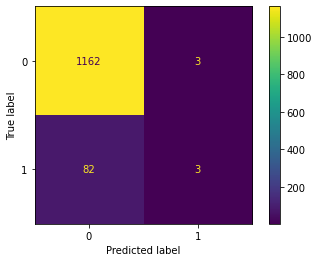

In [81]:
# Part c)
clf = RandomForestClassifier()

param_grid = {"n_estimators": [1, 10, 50, 100],
              "max_features": [1, 5, 10, "auto"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}

# Grid search

clf_grid = GridSearchCV(estimator = clf, param_grid = param_grid)

result = clf_grid.fit(X_train, y_train)

prediction = result.predict(X_test)
pred_probs = result.predict_proba(X_test)[:,1]
print('Optimal Hyperparameters: %s' % result.best_params_,'\n')
print('roc_auc_score is = ',roc_auc_score(y_test, pred_probs), '\n')
print('confusion matrix is -->\n', plot_confusion_matrix(result, X_test, y_true=y_test))

model_scores['model'] = 'random_forest'
model_scores['accuracy'] = accuracy_score(y_test, prediction) 
model_scores['roc_auc_score'] = roc_auc_score(y_test, pred_probs)
scores = scores.append(model_scores, ignore_index=True)

d) [5 pts] Use AdaBoost for this problem. Again, find the best parameters (including n_estimators, learning_rate), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

Optimal Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17} 

roc_auc_score is =  0.8390254986114618 

confusion matrix is -->


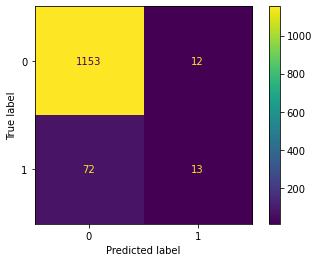

In [82]:
# Part d)

clf = AdaBoostClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search

clf_grid = GridSearchCV(estimator = clf, param_grid = param_grid)

result = clf_grid.fit(X_train, y_train)

prediction = result.predict(X_test)
pred_probs = result.predict_proba(X_test)[:,1]

print('Optimal Hyperparameters: %s' % result.best_params_,'\n')
print('roc_auc_score is = ',roc_auc_score(y_test, pred_probs), '\n')
print('confusion matrix is -->\n', plot_confusion_matrix(result, X_test, y_true=y_test))

model_scores['model'] = 'ada_boost'
model_scores['accuracy'] = accuracy_score(y_test, prediction) 
model_scores['roc_auc_score'] = roc_auc_score(y_test, pred_probs)
scores = scores.append(model_scores, ignore_index=True)

e) [5 pts] Use Gradient Boosting for this problem. Again, find the best parameters (including n_estimators, learning_rate), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

Optimal Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 10, 'random_state': 17} 

roc_auc_score is =  0.8366372128250441 

confusion matrix is -->


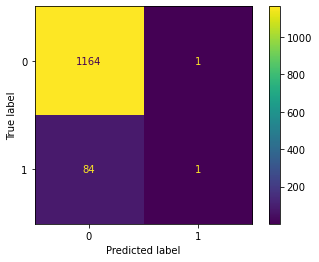

In [83]:
# Part e)

clf = GradientBoostingClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }
# Grid search

clf_grid = GridSearchCV(estimator = clf, param_grid = param_grid)

result = clf_grid.fit(X_train, y_train)

prediction = result.predict(X_test)
pred_probs = result.predict_proba(X_test)[:,1]
print('Optimal Hyperparameters: %s' % result.best_params_,'\n')
print('roc_auc_score is = ',roc_auc_score(y_test, pred_probs), '\n')
print('confusion matrix is -->\n', plot_confusion_matrix(result, X_test, y_true=y_test))

model_scores['model'] = 'gradient_boosting'
model_scores['accuracy'] = accuracy_score(y_test, prediction) 
model_scores['roc_auc_score'] = roc_auc_score(y_test, pred_probs)
scores = scores.append(model_scores, ignore_index=True)

f) [5 pts] Compare the performance of decision tree from part a) with the ensemble methods, Briefly explain which of the three ensemble method performed better and why?

In [74]:
# Part f)
# scores = pd.DataFrame(columns=['model','accuracy','roc_auc_score'])

# scores = scores.append(model_scores, ignore_index=True)
scores

,model,accuracy,roc_auc_score
0,decision_tree,0.888,0.585458
1,bagging,0.9256,0.785711
2,random_forest,0.932,0.837561
3,ada_boost,0.9328,0.839025
4,gradient_boosting,0.932,0.836637


In [85]:
# Checking for class imbalance

print('fraction of positive class in test target column =',sum(y_test)/len(y_test))

fraction of positive class in test target column = 0.068


* Decision tree model has a worse AUC compared to all other ensemble methods and a marginally lower accuracy.

* The ensemble methods have a marginally better accuracy. However, this might be due to the class imbalance seen above (only 6.8% positive class).

* Out of the 3 ensemble models, Adaboost has the best accuracy and roc_auc_score. It performs better than Gradient Boosting as GB is generally prone to overfitting

## Question 3: XGBoost on Datasets with varying Class Imbalance [15 points]

You are given three datasets (all extracted from the [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) dataset which was used in the last question). They have varying levels of class imbalance (positive to negative class ratio):
1. dataset_equally_biased_final has a class ratio of 1:1
2. dataset_originally_biased_final has a class ratio of 1:15
3. dataset_highly_biased_final has a class ratio of 1:39

Use [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) on these three datasets and plot the [calibration curves](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html#sklearn.calibration.calibration_curve) for your predictions. Examine both uniform and quantile binning strategies for your plots and observe how the plots look. For which of the datasets is you model calibrated the best? Which of the binning strategies provide more informative visualization for each of the datasets?

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [21]:
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = pd.read_csv("data_equally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Balanced Dataset")
# Number of classes in training Data
print(y_train1.value_counts())
# Number of classes in test Data
print(y_test1.value_counts())

dataset = pd.read_csv("data_originally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Originally Imbalanced Dataset")
# Number of classes in training Data
print(y_train2.value_counts())
# Number of classes in test Data
print(y_test2.value_counts())

dataset = pd.read_csv("data_highly_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Highly Imbalanced Dataset")
# Number of classes in training Data
print(y_train3.value_counts())
# Number of classes in test Data
print(y_test3.value_counts())

Balanced Dataset
0    4000
1    4000
Name: SeriousDlqin2yrs, dtype: int64
0    1000
1    1000
Name: SeriousDlqin2yrs, dtype: int64
Originally Imbalanced Dataset
0    7466
1     534
Name: SeriousDlqin2yrs, dtype: int64
0    1866
1     134
Name: SeriousDlqin2yrs, dtype: int64
Highly Imbalanced Dataset
0    7800
1     200
Name: SeriousDlqin2yrs, dtype: int64
0    1950
1      50
Name: SeriousDlqin2yrs, dtype: int64


In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
import xgboost

%matplotlib inline

In [23]:
# Using the earlier dataset and applying XGBoost on it

clf = xgboost.XGBClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)

# Balanced Dataset
print("Balanced Dataset")
grid_search.fit(X_train1, y_train1)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train1, y_train1)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt1 = clf.predict(X_test1)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test1, y_pred_gbt1))

y_pred_proba1 = clf.predict_proba(X_test1)[:,1]

acc_score = accuracy_score(y_test1,y_pred_gbt1)
auc_score = roc_auc_score(y_test1,y_pred_proba1)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))


# Originally Imbalanced Dataset

print("Originally Imbalanced Dataset")
grid_search.fit(X_train2, y_train2)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train2, y_train2)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt2 = clf.predict(X_test2)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test2, y_pred_gbt2))

y_pred_proba2 = clf.predict_proba(X_test2)[:,1]

acc_score = accuracy_score(y_test2,y_pred_gbt2)
auc_score = roc_auc_score(y_test2,y_pred_proba2)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

# Highly Imalanced Dataset

print("Highly Imbalanced Dataset")
grid_search.fit(X_train3, y_train3)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train3, y_train3)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt3 = clf.predict(X_test3)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test3, y_pred_gbt3))

y_pred_proba3 = clf.predict_proba(X_test3)[:,1]

acc_score = accuracy_score(y_test3,y_pred_gbt3)
auc_score = roc_auc_score(y_test3,y_pred_proba3)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

Balanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.567 s
predict time 0.0 s
XGBoost conf matrix: 
[[794 206]
 [228 772]]
Accuracy: 0.783
 AUC_ROC: 0.856863

Originally Imbalanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.595 s
predict time 0.0 s
XGBoost conf matrix: 
[[1843   23]
 [ 114   20]]
Accuracy: 0.9315
 AUC_ROC: 0.8342691686263217

Highly Imbalanced Dataset
{'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 17}
training time 0.486 s
predict time 0.0 s
XGBoost conf matrix: 
[[1945    5]
 [  50    0]]
Accuracy: 0.9725
 AUC_ROC: 0.8398564102564102



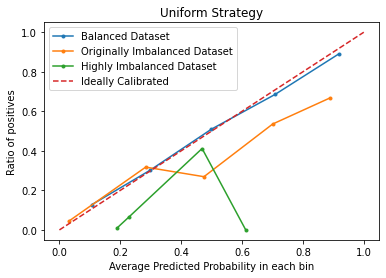

In [77]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

#Plot all calibration curves for strategy = 'uniform' (It is uniform by default)

#Balanced Dataset
prob_true_1, prob_pred_1 = calibration_curve(y_test1, y_pred_proba1, strategy='uniform')

#Originally Imbalanced Dataset
prob_true_2, prob_pred_2 = calibration_curve(y_test2, y_pred_proba2, strategy='uniform')

#Highly Imbalanced Dataset
prob_true_3, prob_pred_3 = calibration_curve(y_test3, y_pred_proba3, strategy='uniform')


plt.plot(prob_pred_1, prob_true_1, marker = '.', label = 'Balanced Dataset')
plt.plot(prob_pred_2, prob_true_2, marker = '.', label = 'Originally Imbalanced Dataset')
plt.plot(prob_pred_3, prob_true_3, marker = '.', label = 'Highly Imbalanced Dataset')

#Perfect calibration
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')

leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.title('Uniform Strategy')
plt.show()

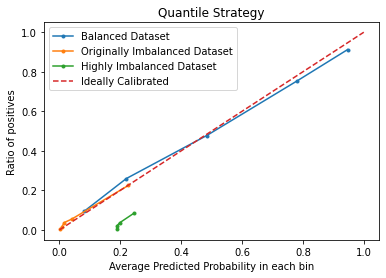

In [76]:
#Plot all calibration curves for strategy = 'quantile'

#Balanced Dataset
prob_true_1, prob_pred_1 = calibration_curve(y_test1, y_pred_proba1, strategy='quantile')

#Originally Imbalanced Dataset
prob_true_2, prob_pred_2 = calibration_curve(y_test2, y_pred_proba2, strategy='quantile')

#Highly Imbalanced Dataset
prob_true_3, prob_pred_3 = calibration_curve(y_test3, y_pred_proba3, strategy='quantile')


plt.plot(prob_pred_1, prob_true_1, marker = '.', label = 'Balanced Dataset')
plt.plot(prob_pred_2, prob_true_2, marker = '.', label = 'Originally Imbalanced Dataset')
plt.plot(prob_pred_3, prob_true_3, marker = '.', label = 'Highly Imbalanced Dataset')

#Perfect calibration
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')


leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.title('Quantile Strategy')

plt.show()

1) XG Boost on the balanced dataset is fitting the most calibrated model. This can be observed in both the binning strategies as the blue line is closest to the red dotted line (ideal i.e. y=x)  

2) In general, quintile strategy is better as it gives a better idea of probability distribution. It is more informative for imbalanced datasets because each bin gets equal number of samples and we get a better idea about calibration of the model. 

3) Where as in the case of imbalanced datasets that have low positive class samples, uniform binning will result in less positive samples in bins with higher mean predicted probability. 

4) On a side note though, as seen in the above 2 plots, uniform strategy is more readable in case of balanced datasets

#Question 4: Deep Learning Mechanisms [5 points]

Briefly explain the motivation behind the following mechanisms commonly used in deep learning: <br>
a) **[2.5 pts]** Skip connections <br>
b) **[2.5 pts]** Batch normalization

# Answer:

**Question 4 Part (a)** 

Skip connections is an improvement over traditional backpropogation. The backpropagation algorithm works by computing the gradient of the loss function with respect to each weight by the chain rule, computing the gradient one layer at a time, iterating backward from the last layer to earlier layers, the gradient grdually beocmes smaller at each step and inadvertently might also become 0. If the weights of the earlier layers becomes 0 then the earlier layers' weights don't get updated usually called a "vanishing gradient".

In the skip connection algorithm, some layers in the network are skipped providing a different route for the gradient. This results in a smoother and faster model as convergence is quicker. They also ensure interrupted gradient flow from first layer to last layer and alsi ensure feature reusability. There are 2 methods through skip connections can be achieved - 

1) Via Addition (ResNet) - The gradeint is preserved by back propogating by using an identity function and vector addition
2) Via concatentation (DenseNet) - The fetaures are concatenated to preserve and ensure maximum onformation flow between layers. This assists in reusing features from earlier layers.

**Question 4 Part (b)** 

Deep neural networks with many layers are difficult to train as they can be sensitive to the initial random weights and configuration of the learning algorithm.

This might be happening due to the distribution of the inputs to layers deep in the network, which may change after each mini-batch when the weights are updated. This can cause the learning algorithm to forever chase a moving target. This change in the distribution of inputs to layers in the network is referred to “internal covariate shift.”

Batch normalization is a method to train very deep neural networks that standardizes the inputs to a layer for each mini-batch based on the mini-batch statistics. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks, helping the model to coverge faster.